<a href="https://colab.research.google.com/github/darialrsm/Machine-learning/blob/main/%D0%A5%D0%B0%D1%85%D0%BB%D1%94%D0%B2%D0%B0_%D0%BF%D1%80_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests

**Завдання 1**

Автор: Хахлєва Дар'я, ФІТ 4-11

Обрoбка та аналіз даних про ВВП країн. Датасет було отримано з Вікіпедії з використанням бібліотеки Pandas

1. Вивести перших 5 рядків.

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(html)
df = tables[2]
df.head()

/tmp/ipython-input-2924084937.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


,Country/Territory,IMF (2025)[1][6],World Bank (2022–24)[7],United Nations (2023)[8]
0,World,113795678,111326370,100834796
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778


2. Визначити розмір датасета.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country/Territory         222 non-null    object
 1   IMF (2025)[1][6]          222 non-null    object
 2   World Bank (2022–24)[7]   222 non-null    object
 3   United Nations (2023)[8]  222 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


3. Визначити оптимальну кількість стовпців.

In [5]:
df.columns = (df.columns
              .str.replace(r'(?:\s*\[\d+\])+', '', regex=True)  # прибрати [1], [6], ...
              .str.replace('Country/Territory', 'Country', regex=False))
df

,Country,IMF (2025),World Bank (2022–24),United Nations (2023)
0,World,113795678,111326370,100834796
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778
...,...,...,...,...
217,Kiribati,312,308,289
218,Marshall Islands,297,280,270
219,Nauru,169,160,176
220,Montserrat,—,—,80


4. Змінити назви стовпців на більш зручні

In [6]:
df = df.rename(columns={
    "IMF (2025)": "IMF_2025",
    "World Bank (2022–24)": "WorldBank_2022_24",
    "United Nations (2023)": "UN_2023"
})
df

,Country,IMF_2025,WorldBank_2022_24,UN_2023
0,World,113795678,111326370,100834796
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778
...,...,...,...,...
217,Kiribati,312,308,289
218,Marshall Islands,297,280,270
219,Nauru,169,160,176
220,Montserrat,—,—,80


5. Визначити тип даних.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            222 non-null    object
 1   IMF_2025           222 non-null    object
 2   WorldBank_2022_24  222 non-null    object
 3   UN_2023            222 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


6. Замініть у таблиці значення "—" на значення NaN. Перевірити
наявність пропущених значень. При наявності, замінити пропущені
значення на середнє значення.


In [8]:
df.isnull().sum()

,0
Country,0
IMF_2025,0
WorldBank_2022_24,0
UN_2023,0


In [10]:
# Convert columns to float type
df['IMF_2025'] = pd.to_numeric(df['IMF_2025'], errors='coerce')
df['WorldBank_2022_24'] = pd.to_numeric(df['WorldBank_2022_24'], errors='coerce')
df['UN_2023'] = pd.to_numeric(df['UN_2023'], errors='coerce')

print(f'Types:\n{df.dtypes}')
df.head(10)

Types:
Country               object
IMF_2025             float64
WorldBank_2022_24    float64
UN_2023              float64
dtype: object


,Country,IMF_2025,WorldBank_2022_24,UN_2023
0,World,113795678.0,111326370.0,100834796.0
1,United States,30507217.0,29184890.0,27720700.0
2,China[n 1],19231705.0,18743803.0,17794782.0
3,Germany,4744804.0,4659929.0,4525704.0
4,India,4187017.0,3912686.0,3575778.0
5,Japan,4186431.0,4026211.0,4204495.0
6,United Kingdom,3839180.0,3643834.0,3380855.0
7,France,3211292.0,3162079.0,3051832.0
8,Italy,2422855.0,2372775.0,2300941.0
9,Canada,2225341.0,2241253.0,2142471.0


In [11]:
df.isnull().sum()

,0
Country,0
IMF_2025,32
WorldBank_2022_24,12
UN_2023,9


In [13]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=1)

7. Ще раз перевірити наявність пропущених значень.

In [14]:

df.isnull().sum()

,0
Country,0
IMF_2025,0
WorldBank_2022_24,0
UN_2023,0


8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.drop_duplicates(inplace=True)

9. Вивести описову статистику датасету describe()

In [17]:
df.describe()

,IMF_2025,WorldBank_2022_24,UN_2023
count,2.220000e+02,2.220000e+02,2.220000e+02
mean,1.026422e+06,1.001441e+06,9.318266e+05
std,8.000970e+06,7.815456e+06,7.111501e+06
min,6.500000e+01,6.200000e+01,6.800000e+01
25%,7.443250e+03,7.145500e+03,6.768250e+03
50%,3.413800e+04,3.300050e+04,3.047200e+04
75%,2.334965e+05,2.216745e+05,2.273310e+05
max,1.137957e+08,1.113264e+08,1.008348e+08


10.Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)?

In [18]:
# Count difference between IMF_Forecast and WB_Estimate for each country
df['IMF_WB_Diff'] = abs(df['IMF_2025'] - df['WorldBank_2022_24'])

# Find which country has the largest difference between IMF and WB
max_diff = df['IMF_WB_Diff'].max()

country = df[df['IMF_WB_Diff'] == max_diff]['Country'].values[0]
print(f'{country} has the largest difference between IMF and WB: {max_diff}')

df.head(10)

World has the largest difference between IMF and WB: 2469308.0


,Country,IMF_2025,WorldBank_2022_24,UN_2023,IMF_WB_Diff
0,World,113795678.0,111326370.0,100834796.0,2469308.0
1,United States,30507217.0,29184890.0,27720700.0,1322327.0
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0
3,Germany,4744804.0,4659929.0,4525704.0,84875.0
4,India,4187017.0,3912686.0,3575778.0,274331.0
5,Japan,4186431.0,4026211.0,4204495.0,160220.0
6,United Kingdom,3839180.0,3643834.0,3380855.0,195346.0
7,France,3211292.0,3162079.0,3051832.0,49213.0
8,Italy,2422855.0,2372775.0,2300941.0,50080.0
9,Canada,2225341.0,2241253.0,2142471.0,15912.0


In [22]:
df['IMF_WB_Diff'] = abs(df['IMF_2025'] - df['WorldBank_2022_24'])
top5 = df.nlargest(5, 'IMF_WB_Diff')[['Country', 'IMF_WB_Diff']]
print("Країни з найбільшою різницею між прогнозами МВФ і Світового банку:")
print(top5)

Країни з найбільшою різницею між прогнозами МВФ і Світового банку:
          Country  IMF_WB_Diff
0           World    2469308.0
1   United States    1322327.0
2      China[n 1]     487902.0
4           India     274331.0
6  United Kingdom     195346.0


11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?

In [23]:
# Calculate correlation between IMF and WB and UN
cor_IMF_WB = df['IMF_2025'].corr(df['WorldBank_2022_24'])
cor_IMF_UN = df['IMF_2025'].corr(df['UN_2023'])
cor_WB_UN = df['WorldBank_2022_24'].corr(df['UN_2023'])

print(f'Correlation between IMF and WB: {cor_IMF_WB}')
print(f'Correlation between IMF and UN: {cor_IMF_UN}')
print(f'Correlation between  WB and UN: {cor_WB_UN}')

Correlation between IMF and WB: 0.999977690127134
Correlation between IMF and UN: 0.999921815941023
Correlation between  WB and UN: 0.999877861823299


In [24]:
# Find highest correlation
max_cor = max(cor_IMF_WB, cor_IMF_UN, cor_WB_UN)
if max_cor == cor_IMF_WB:
    print('IMF and WB have the highest correlation')
elif max_cor == cor_IMF_UN:
    print('IMF and UN have the highest correlation')
else:
    print('WB and UN have the highest correlation')

IMF and WB have the highest correlation


12. Обчисліть середнє значення для кожного стовпця

In [25]:
mean_IMF = df['IMF_2025'].mean()
mean_IMF

np.float64(1026421.6576576576)

In [26]:
mean_WB = df['WorldBank_2022_24'].mean()
mean_WB

np.float64(1001440.5720720721)

In [27]:
mean_UN = df['UN_2023'].mean()
mean_UN

np.float64(931826.6486486486)

Найменше середнє у даних ООН (2023), найбільше середнє значення - МВФ (2025)

13.Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?

In [28]:
# Find standard deviation for each row
df['std'] = df.iloc[:, 1:].std(axis=1)

# Find country with the highest standard deviation
max_std = df['std'].max()
country = df[df['std'] == max_std]['Country'].values[0]
print(f'{country} has the highest standard deviation: {max_std}')

df.head(10)

World has the highest standard deviation: 53388001.85383506


,Country,IMF_2025,WorldBank_2022_24,UN_2023,IMF_WB_Diff,std
0,World,113795678.0,111326370.0,100834796.0,2469308.0,5.338800e+07
1,United States,30507217.0,29184890.0,27720700.0,1322327.0,1.395413e+07
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0,9.070739e+06
3,Germany,4744804.0,4659929.0,4525704.0,84875.0,2.281086e+06
4,India,4187017.0,3912686.0,3575778.0,274331.0,1.825940e+06
5,Japan,4186431.0,4026211.0,4204495.0,160220.0,1.991026e+06
6,United Kingdom,3839180.0,3643834.0,3380855.0,195346.0,1.723234e+06
7,France,3211292.0,3162079.0,3051832.0,49213.0,1.547697e+06
8,Italy,2422855.0,2372775.0,2300941.0,50080.0,1.158803e+06
9,Canada,2225341.0,2241253.0,2142471.0,15912.0,1.094412e+06


In [32]:
country2 = df.nlargest(2, 'std').iloc[-1]
print(f"{country2['Country']} has the highest standard deviation: {country2['std']}")

United States has the highest standard deviation: 13954125.424435468


14.Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [33]:
# Find max and min GDP for each year
max_IMF = df['IMF_2025'].max(); min_IMF = df['IMF_2025'].min()
max_WB = df['WorldBank_2022_24'].max(); min_WB = df['WorldBank_2022_24'].min()
max_UN = df['UN_2023'].max(); min_UN = df['UN_2023'].min()

print(f'Max IMF: {max_IMF}, Min IMF: {min_IMF}')
print(f'Max WB: {max_WB}, Min WB: {min_WB}')
print(f'Max UN: {max_UN}, Min UN: {min_UN}')

Max IMF: 113795678.0, Min IMF: 65.0
Max WB: 111326370.0, Min WB: 62.0
Max UN: 100834796.0, Min UN: 68.0


15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?


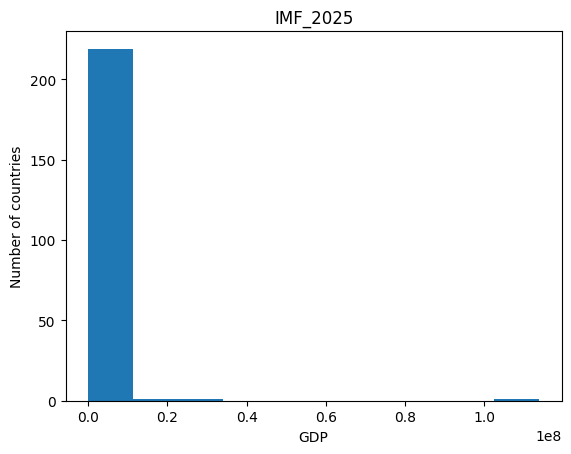

In [35]:
import matplotlib.pyplot as plt

# Build a histogram of IMF_Forecast
plt.hist(df['IMF_2025'], bins=10)
plt.title('IMF_2025')
plt.xlabel('GDP')
plt.ylabel('Number of countries')
plt.show()

Більшість країн розташовані у нижній частині та мають відносно низький ВВП, і лише кілька країн мають дуже високі значення.

16.Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [37]:
# Calculate share of world GDP for each country for each year
df['IMF_Share'] = df['IMF_2025'] / df['IMF_2025'].sum()
df['WB_Share'] = df['WorldBank_2022_24'] / df['WorldBank_2022_24'].sum()
df['UN_Share'] = df['UN_2023'] / df['UN_2023'].sum()

df.head(10)

,Country,IMF_2025,WorldBank_2022_24,UN_2023,IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share
0,World,113795678.0,111326370.0,100834796.0,2469308.0,5.338800e+07,0.499398,0.500749,0.487441
1,United States,30507217.0,29184890.0,27720700.0,1322327.0,1.395413e+07,0.133882,0.131274,0.134003
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0,9.070739e+06,0.084399,0.084310,0.086021
3,Germany,4744804.0,4659929.0,4525704.0,84875.0,2.281086e+06,0.020823,0.020960,0.021878
4,India,4187017.0,3912686.0,3575778.0,274331.0,1.825940e+06,0.018375,0.017599,0.017286
5,Japan,4186431.0,4026211.0,4204495.0,160220.0,1.991026e+06,0.018372,0.018110,0.020325
6,United Kingdom,3839180.0,3643834.0,3380855.0,195346.0,1.723234e+06,0.016848,0.016390,0.016343
7,France,3211292.0,3162079.0,3051832.0,49213.0,1.547697e+06,0.014093,0.014223,0.014753
8,Italy,2422855.0,2372775.0,2300941.0,50080.0,1.158803e+06,0.010633,0.010673,0.011123
9,Canada,2225341.0,2241253.0,2142471.0,15912.0,1.094412e+06,0.009766,0.010081,0.010357


17.Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

In [38]:
# Find top 10 countries with the most significant change in share of world GDP between IMF and UN
df['IMF_UN_Diff'] = abs(df['IMF_Share'] - df['UN_Share'])
df_top10 = df.nlargest(10, 'IMF_UN_Diff')
df_top10

,Country,IMF_2025,WorldBank_2022_24,UN_2023,IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share,IMF_UN_Diff
0,World,113795678.0,111326370.0,100834796.0,2469308.0,5.338800e+07,0.499398,0.500749,0.487441,0.011957
5,Japan,4186431.0,4026211.0,4204495.0,160220.0,1.991026e+06,0.018372,0.018110,0.020325,0.001952
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0,9.070739e+06,0.084399,0.084310,0.086021,0.001622
10,Brazil,2125958.0,2179412.0,2191132.0,53454.0,1.056404e+06,0.009330,0.009803,0.010592,0.001262
15,Mexico,1692640.0,1852723.0,1793799.0,160083.0,8.125126e+05,0.007428,0.008334,0.008671,0.001243
4,India,4187017.0,3912686.0,3575778.0,274331.0,1.825940e+06,0.018375,0.017599,0.017286,0.001089
3,Germany,4744804.0,4659929.0,4525704.0,84875.0,2.281086e+06,0.020823,0.020960,0.021878,0.001055
13,South Korea,1790322.0,1712793.0,1839058.0,77529.0,8.531833e+05,0.007857,0.007704,0.008890,0.001033
59,Nigeria,188271.0,187760.0,374984.0,511.0,1.528782e+05,0.000826,0.000845,0.001813,0.000986
16,Turkey,1437406.0,1323255.0,1118253.0,114151.0,6.040193e+05,0.006308,0.005952,0.005406,0.000902


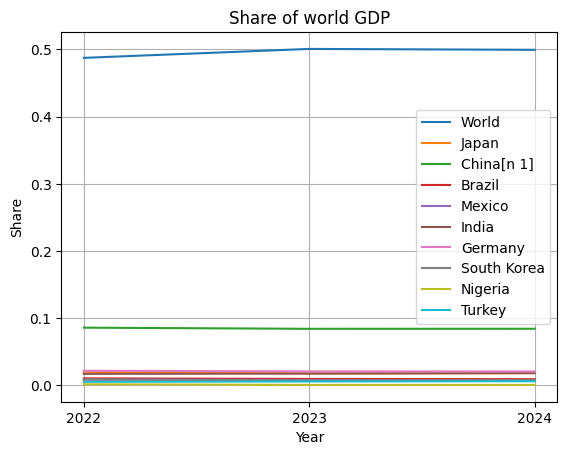

In [39]:
for index, row in df_top10.iterrows():
    plt.plot(row[['UN_Share', 'WB_Share', 'IMF_Share']], label=row['Country'])

plt.title('Share of world GDP')
plt.xlabel('Year')
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'])
plt.ylabel('Share')
plt.legend()
plt.grid()
plt.show()

З візуалізації видно, що суттєвих змін по країнах не відбулось. Найбільше можна виділити лише Китай